# Training errors and test errors

How do we evaluate how well a classification algorithm performs? So far we've only looked at the error on the training set. However, we know the training set. What we really want is good performance on *unknown* data? How can that be measured?

Let's look at the MNIST dataset again.

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import zero_one_loss

Let's fetch the data. 

In [2]:
# fetch data from openml.org
# see https://en.wikipedia.org/wiki/MNIST_database
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
# the classes are accessed via mnist.target
# however, they are stored as strings and we want the digits to be stored as integers
# we use astype to convert them
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
# newer versions of scikit-learn use pandas dataframe to store the data
# we convert these to a simple numpy array 
X, y = np.array(mnist["data"]), np.array(mnist["target"]) 
X.shape  # X.shape returns the dimensions of the array X

(70000, 784)

Again, have a look at a sample, just to get feeling with what we're dealing.

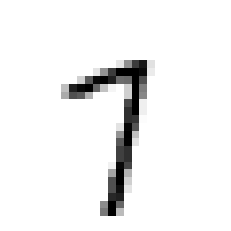

In [3]:
# let's plot a data point
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis("off")
plot_digit(X[42,:])

## Training and test set

In machine learning, we normally split the available data into two (sometimes more) parts: a training set and a test set. The training set is used for learning, ie, to *train* the classifier. With the test set we evaluate the classifier. 

There are 70000 samples in the data set. Normally, we'd take the larger part, say 60000 samples, for the training set and the rest for the test set. However, some of the algorithms below are really quite slow to train. So let's take a substantially smaller training set, just because I'm impatient.

In [4]:
# we pick a large random subset as training set
# the rest makes up the test set
X, y = sklearn.utils.shuffle(X,y)  # make sure the data is in random order
train_size=10000 # we pick 10000 of the 70000 samples for the training set, the rest goes into the test set
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

Let's look at the distribution of classes in the training set.

(array([ 945., 1107.,  983., 1023.,  941.,  919., 1012., 1087.,  947.,
        1036.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

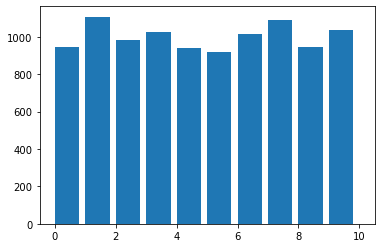

In [5]:
fig,ax=plt.subplots()
ax.hist(y_train,width=0.8,bins=range(11))

What we see: the classes are roughly balanced. This makes life easier. If the class distribution is severely skewed we need to take extra precautions. If the training data consists of 990 pictures of cats and only 10 pictures of dogs then prediction becomes too easy: don't even look at the pictures and simply answer 'cat'. Obviously, that procedure has not learnt how a cat picture looks like.

## Train and evaluate logistic regression

Let's start by training a logistic regression. Afterwards we evaluate it with the test set. Warning: this will take a while.

In [12]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='sag',max_iter=500)  

logreg.fit(X_train,y_train)
train_err=zero_one_loss(y_train,logreg.predict(X_train))
print('training error: {:.3}%'.format(train_err*100))

training error: 0.26%


/home/henning/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Okay didn't converge, the training error looks good though. It took a while. 

Let's compute the test error. 

In [7]:
test_err=zero_one_loss(y_test,logreg.predict(X_test))
print('test error: {:.3}%'.format(test_err*100))

test error: 13.8%


Huh, much worse! We see, a good training error does not guarantee a good test error.

## Decision tree

Let's fit a decision tree. (We'll say later how a decision tree works.) A decision tree can fit a dataset extremely well. So hopefully, it'll be a good classifier.

In [8]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier()
dectree.fit(X_train,y_train)
train_err=zero_one_loss(y_train,dectree.predict(X_train))
print('training error: {:.3}%'.format(train_err*100))

training error: 0.0%


Ah, perfect classification! So, it's a good classifier, right? Let's try on the test set...

In [9]:
test_err=zero_one_loss(y_test,dectree.predict(X_test))
print('test error: {:.3}%'.format(test_err*100))

test error: 19.1%


That's a really large error! Obviously, small training error does not *at all* indicate good performance on new data.

## Nearest neighbour

In [10]:
from sklearn.neighbors import KNeighborsClassifier
one_nn=KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X_train,y_train)
train_err=zero_one_loss(y_train,one_nn.predict(X_train))
print('training error: {:.3}%'.format(train_err*100))

training error: 0.0%


A zero training error is not at all surprising, if you think about it for a second.

In [11]:
test_err=zero_one_loss(y_test,one_nn.predict(X_test))
print('test error: {:.3}%'.format(test_err*100))

test error: 5.06%


We see: a much better test error than above!

By the way, that we compare different classifiers with the help of the test error is quite typical. Based on these results we might then decide that nearest neighbour is the most suited algorithm for this task. (It's not! There are much better classifiers.)